<a href="https://colab.research.google.com/github/felipeddragon/dashboard-vendas/blob/main/notebooks/Dashboard_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ===============================
# 1. Importar bibliotecas
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
# ===============================
# 2. Importar Arquivo
# ===============================
from google.colab import files

# Enviar arquivo CSV
uploaded = files.upload()

Saving Zara_Sales_Analysis.csv to Zara_Sales_Analysis (1).csv


In [4]:
# ===============================
# 3. Carregar dataset
# ===============================
df = pd.read_csv("Zara_Sales_Analysis.csv", sep=";")

print("Dataset carregado com sucesso!")


Dataset carregado com sucesso!


In [5]:
# ===============================
# 4. Limpeza de dados
# ===============================
# Remover duplicatas
df = df.drop_duplicates()

# Remover linhas com valores ausentes
df = df.dropna()

# Converter colunas numéricas
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["Sales Volume"] = pd.to_numeric(df["Sales Volume"], errors="coerce")

print("Dados limpos com sucesso!")
print(df.info())

Dados limpos com sucesso!
<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        250 non-null    int64  
 1   Product Position  250 non-null    object 
 2   Promotion         250 non-null    object 
 3   Product Category  250 non-null    object 
 4   Seasonal          250 non-null    object 
 5   Sales Volume      250 non-null    int64  
 6   brand             250 non-null    object 
 7   url               250 non-null    object 
 8   sku               250 non-null    object 
 9   name              250 non-null    object 
 10  description       250 non-null    object 
 11  price             250 non-null    float64
 12  currency          250 non-null    object 
 13  scraped_at        250 non-null    object 
 14  terms             250 non-null    object 
 15  section           250 non-null    object 
dtypes: float64(1), int64(2)

In [6]:
# ===============================
# 5. Criar coluna de Receita
# ===============================
df["Revenue"] = df["price"] * df["Sales Volume"]

# Exibir top 5 produtos por receita
top5 = df.sort_values(by="Revenue", ascending=False).head(5)
print("Top 5 produtos por receita:")
display(top5[["name", "Product Category", "Revenue"]])


Top 5 produtos por receita:


,name,Product Category,Revenue
38,SUEDE JACKET,Clothing,649140.0
87,LONGLINE QUILTED JACKET,Clothing,481481.0
67,WOOL BLEND TEXTURED JACKET,Clothing,447174.0
169,CASHMERE BLEND KNIT SWEATER,Clothing,434668.0
4,DOUBLE FACED JACKET,Clothing,408938.0



Resumo das vendas:
       Sales Volume       Revenue
count    250.000000     250.00000
mean    1822.224000  152399.41392
std      700.136055  102579.40175
min      529.000000    4330.58000
25%     1239.000000   77537.25000
50%     1836.500000  127389.75000
75%     2402.250000  198364.35000
max     2989.000000  649140.00000


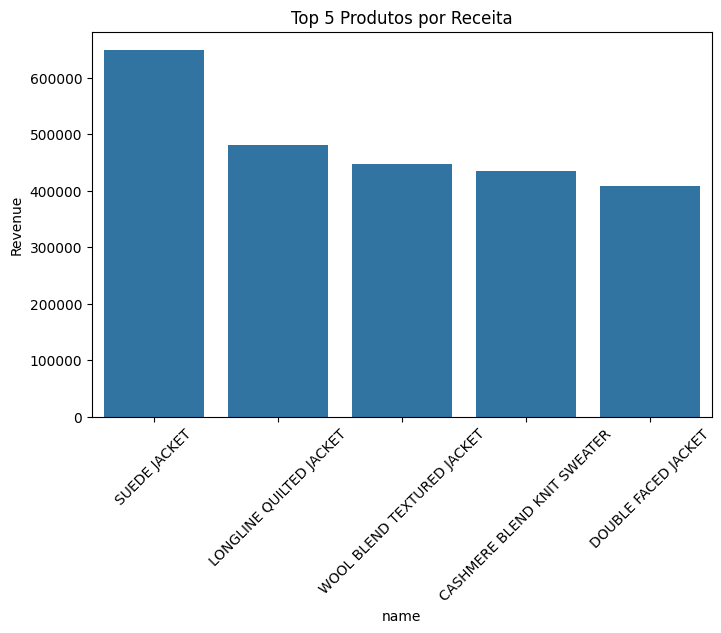

In [9]:
# ===============================
# 5. Estatísticas e visualização
# ===============================
print("\nResumo das vendas:")
print(df[["Sales Volume", "Revenue"]].describe())

# Gráfico simples
plt.figure(figsize=(8,5))
sns.barplot(x="name", y="Revenue", data=top5)
plt.xticks(rotation=45)
plt.title("Top 5 Produtos por Receita")
plt.show()